<a href="https://colab.research.google.com/github/salmabk3/ADAS-Pedestrian-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection
%cd ADAS-Pedestrian-Detection


Cloning into 'ADAS-Pedestrian-Detection'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 52 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 15.88 KiB | 15.88 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/ADAS-Pedestrian-Detection


In [10]:
import sys
sys.path.append('src')

import yolo
import depth
import fusion
import adas

print("Project structure OK ✅")


ModuleNotFoundError: No module named 'ultralytics'

In [5]:
print("ana nada waa3ra sba3iya")

ana nada waa3ra sba3iya


In [6]:
!pip install ultralytics opencv-python torch matplotlib
!pip install timm  # nécessaire si tu utilises MiDaS ou DepthAnything



# Chargement des modèles

YOLO pour la détection de piétons

In [9]:
# 1. On clone le projet à nouveau
!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection.git

# 2. On entre dans le dossier (Important : utilisez %cd et non !cd)
%cd ADAS-Pedestrian-Detection

# 3. Vérification
print("Dossier actuel :")
!pwd
print("Contenu :")
!ls

Cloning into 'ADAS-Pedestrian-Detection'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 61 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 19.61 KiB | 9.81 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection
Dossier actuel :
/content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection
Contenu :
data  main.ipynb  README.md  requirements.txt  src


✅ Image chargée : 559x536 pixels
Lancement de YOLO...
Chargement de YOLO (yolov8n.pt)...
Nombre de piétons détectés : 2


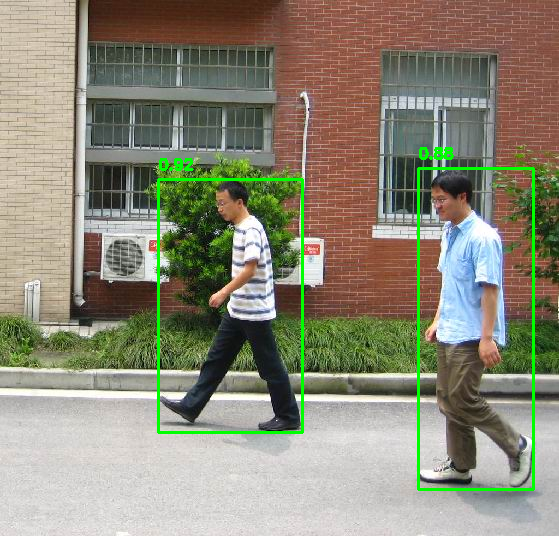

In [13]:
# Installation de YOLO et des autres outils nécessaires
!pip install ultralytics
!pip install transformers # Pour la suite (profondeur)
import cv2
import sys
import os
from google.colab.patches import cv2_imshow

# 1. Configuration du chemin pour trouver votre fichier src/yolo.py
# On s'assure que Python regarde bien dans le dossier du projet
if os.path.exists('/content/ADAS-Pedestrian-Detection'):
    sys.path.append('/content/ADAS-Pedestrian-Detection/src')
else:
    # Cas où vous seriez déjà dans le dossier
    sys.path.append(os.path.abspath('src'))

# Import de VOTRE classe (celle que vous avez mise sur GitHub)
from yolo import YoloDetector

# 2. Chargement de l'image
# On donne le chemin ABSOLU (l'adresse complète)
filename = '/content/FudanPed00001.png'
img = cv2.imread(filename)

if img is None:
    print(f"❌ Erreur : Impossible de lire '{filename}'. Vérifiez qu'elle est bien dans le panneau de fichiers à gauche !")
else:
    print(f"✅ Image chargée : {img.shape[1]}x{img.shape[0]} pixels")

    # 3. Initialisation et Détection
    print("Lancement de YOLO...")
    detector = YoloDetector(model_name='yolov8n.pt')
    boxes = detector.detect(img)

    print(f"Nombre de piétons détectés : {len(boxes)}")

    # 4. Dessin des résultats
    for box in boxes:
        x1, y1, x2, y2, conf, cls = box
        # Dessiner le rectangle vert
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Ajouter le score de confiance
        cv2.putText(img, f"{conf:.2f}", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    # 5. Affichage final
    cv2_imshow(img)